In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Class.Helper import Helper as Helper
helper = Helper()

In [ ]:
def normalizeFeatures(features_df, fuzzifier):
for x in fuzzifier.features:
    features_df[x.label] = (
        features_df[x.label] - features_df[x.label].min()) / (
            features_df[x.label].max() - features_df[x.label].min())

self.showResults(features_df)

return features_df

C:\Programy\Anaconda\envs\py35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


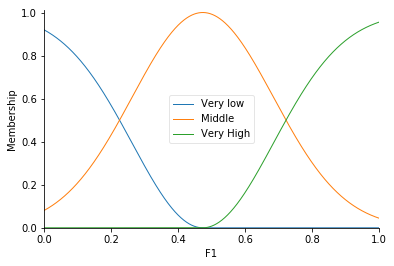

In [8]:
df = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Pickle/Haberman/3 Gausses/features.p", "rb"))
df[1].view()

C:\Programy\Anaconda\envs\py35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


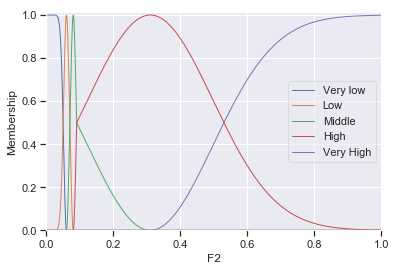

In [153]:
df = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Pickle/Haberman/5 Gausses/features.p", "rb"))
df[2].view()

In [145]:
df = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Pickle/Data Banknote Authentication/5 Gausses/features.p", "rb"))
df[0].view()

IndexError: list index out of range

C:\Programy\Anaconda\envs\py35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


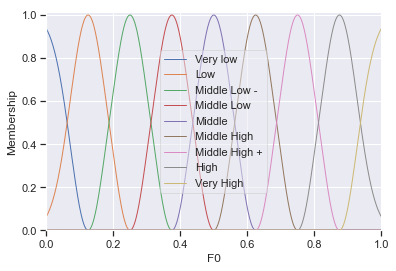

In [115]:
df = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Pickle/Data Banknote Authentication/9 Gausses/features.p", "rb"))
df[0].view()

C:\Programy\Anaconda\envs\py35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


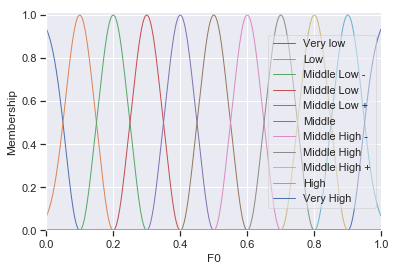

In [117]:
df = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Pickle/Haberman/11 Gausses/features.p", "rb"))
df[0].view()

In [85]:
banknote = pd.read_csv("../Data/Data Banknote Authentication.csv", sep=";")

for x in ["F0", "F1", "F2", "F3"]:
    banknote[x] = (
        banknote[x] - banknote[x].min()) / (
            banknote[x].max() - banknote[x].min())
    
banknote.head()

,F0,F1,F2,F3,Decision
0,0.769004,0.839643,0.106783,0.736628,Zero
1,0.835659,0.820982,0.121804,0.644326,Zero
2,0.786629,0.416648,0.310608,0.786951,Zero
3,0.757105,0.871699,0.054921,0.450440,Zero
4,0.531578,0.348662,0.424662,0.687362,Zero


In [80]:
haberman = pd.read_csv("../Data/Haberman.csv", sep=";")

for x in ["F0", "F1", "F2"]:
    haberman[x] = (
        haberman[x] - haberman[x].min()) / (
            haberman[x].max() - haberman[x].min())
    
haberman.head()

,F0,F1,F2,Decision
0,0.000000,0.545455,0.019231,Zero
1,0.000000,0.363636,0.057692,Zero
2,0.000000,0.636364,0.000000,Zero
3,0.018868,0.090909,0.038462,Zero
4,0.018868,0.636364,0.076923,Zero


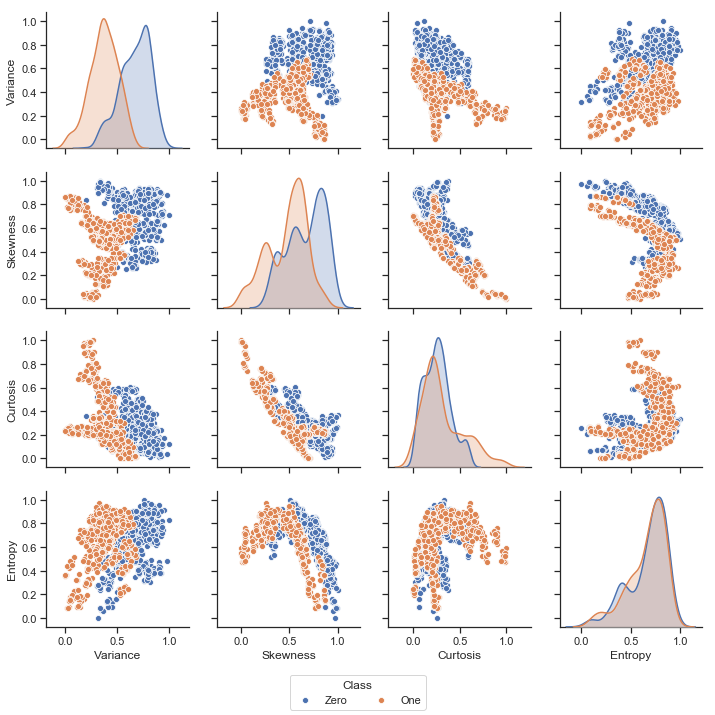

In [99]:
banknote = banknote.rename(index=str, columns={"F0": "Variance", "F1": "Skewness", "F2": "Curtosis", "F3": "Entropy", "Decision": "Class"})
sns.set(style="ticks", color_codes=True)
seaborn_plot_banknote = sns.pairplot(banknote[banknote.columns[0:5]], hue="Class")
handles = seaborn_plot_banknote._legend_data.values()
labels = seaborn_plot_banknote._legend_data.keys()
seaborn_plot_banknote._legend.remove()
seaborn_plot_banknote.fig.legend(handles=handles, labels=labels, title="Class", loc='lower center', ncol=3)
seaborn_plot_banknote.fig.subplots_adjust(bottom=0.12)
seaborn_plot_banknote.savefig("Data Banknote Authentication" + ".png")

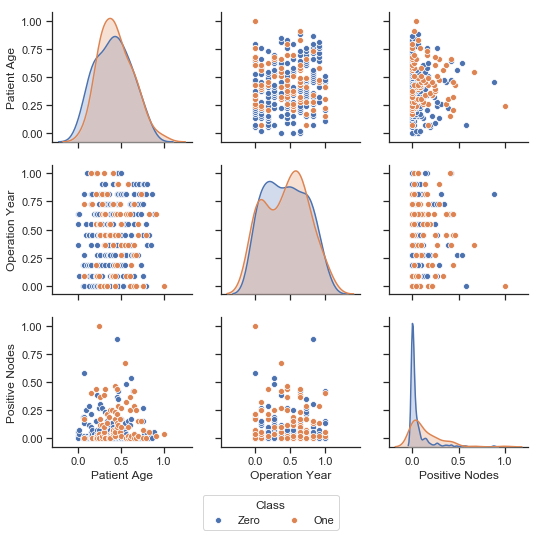

In [102]:
haberman = haberman.rename(index=str, columns={"F0": "Patient Age", "F1": "Operation Year", "F2": "Positive Nodes", "Decision": "Class"})
sns.set(style="ticks", color_codes=True)
seaborn_plot_haberman = sns.pairplot(haberman[haberman.columns[0:4]], hue="Class")
handles = seaborn_plot_haberman._legend_data.values()
labels = seaborn_plot_haberman._legend_data.keys()
seaborn_plot_haberman._legend.remove()
seaborn_plot_haberman.fig.legend(handles=handles, labels=labels, title="Class", loc='lower center', ncol=3)
seaborn_plot_haberman.fig.subplots_adjust(bottom=0.16)
seaborn_plot_haberman.savefig("Haberman" + ".png")

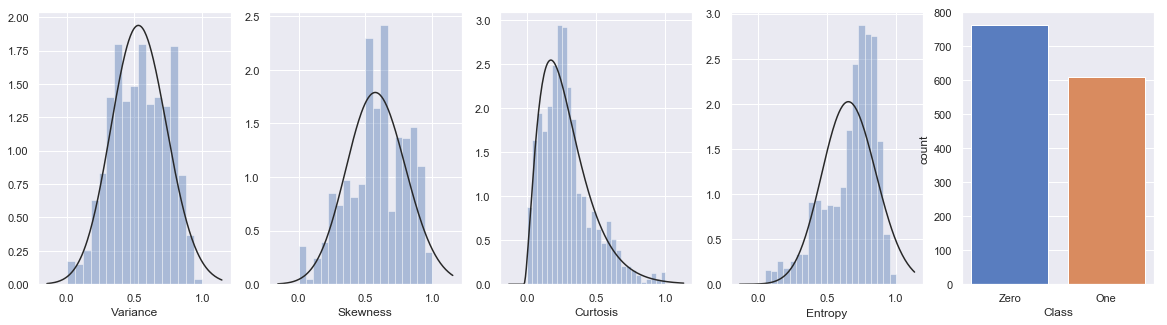

In [107]:
from scipy import stats
sns.set(color_codes="Paired")
f, axes = plt.subplots(1, 5, figsize=(20, 5))
sns.distplot(banknote.Variance, kde=False, fit=stats.gamma, ax=axes[0], color= "b");
sns.distplot(banknote.Skewness, kde=False, fit=stats.gamma, ax=axes[1], color= "b");
sns.distplot(banknote.Curtosis, kde=False, fit=stats.gamma, ax=axes[2], color= "b");
sns.distplot(banknote.Entropy, kde=False, fit=stats.gamma, ax=axes[3], color= "b");
sns.countplot(x='Class', data=banknote, ax=axes[4], palette="muted")
f.savefig("Data Banknote Authentication_Hist" + ".png")


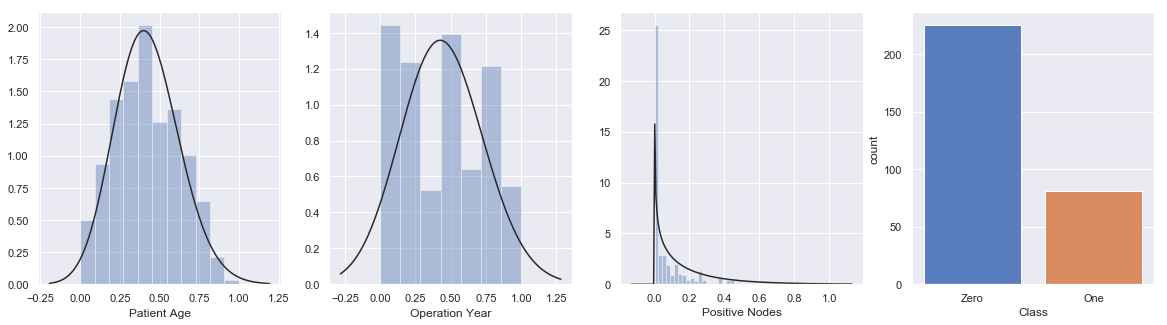

In [106]:
from scipy import stats
sns.set(color_codes="Paired")
# sns.set(style="ticks", color_codes=True)
f, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.distplot(haberman["Patient Age"], kde=False, fit=stats.gamma, ax=axes[0], color= "b");
sns.distplot(haberman["Operation Year"], kde=False, fit=stats.gamma, ax=axes[1], color= "b");
sns.distplot(haberman["Positive Nodes"], kde=False, fit=stats.gamma, ax=axes[2], color= "b");
sns.countplot(x='Class', data=haberman, ax=axes[3], palette="muted")
f.savefig("Haberman_Hist" + ".png")